<a href="https://colab.research.google.com/github/sahiladhav/Data-Analysis-EDA-Hypothesis-and-Linear-Regression-/blob/main/Bike%20Sharing%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sahil Adhav**\
**019090188**

# **Bike Sharing Dataset Proposal**

## **Introduction**

I selected the Bike Sharing dataset because it provides detailed daily records of bike rental activity including weather and seasonal information. I am curious to understand the factors that influence bike rental demand, such as weather conditions, temperature, and seasonal trends. From a stakeholder perspective, such data can inform decisions related to bike fleet management, maintenance scheduling, and targeted promotions during high-demand periods.


## **Data**

### **Data Source**

- **Citation:** UCI Machine Learning Repository: Bike Sharing Dataset  
- **URL:** [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

### **Data Collection**

The data was collected from a bike sharing system in the Capital bike share system with daily counts of rental bikes between years 2011 and 2012, including weather and seasonal information collected from weather stations.


### **Cases**

The rows represent a single day's aggregated activity and weather condition. There are a total of 731 days (cases) in the `day.csv` dataset.


#### **Variables**

The dataset consists of **16 variables**:

| Variable Name | Variable Type | Description |
| :--- | :--- | :--- |
| **`dteday`** | Date/Time | The date of the observation (YYYY-MM-DD). |
| **`season`** | Categorical | 1:springer, 2:summer, 3:fall, 4:winter. |
| **`yr`** | Categorical/Binary | Year (0: 2011, 1: 2012). |
| **`holiday`** | Categorical/Binary | Whether the day is a holiday (0: no, 1: yes). |
| **`weekday`** | Categorical | Day of the week (0 to 6). |
| **`weathersit`** | **Categorical** | 1: Clear/Partly Cloudy, 2: Mist/Cloudy, 3: Light Rain/Snow, 4: Heavy Rain/Fog. |
| **`temp`** | **Continuous Numerical** | Normalized temperature in Celsius. |
| **`hum`** | **Continuous Numerical** | Normalized humidity. |
| **`windspeed`** | **Continuous Numerical** | Normalized wind speed. |
| `casual` | Continuous Numerical | Count of casual users. |
| `registered` | Continuous Numerical | Count of registered users. |
| **`cnt`** | **Continuous Numerical** | Total count of rental bikes (casual + registered). **(Target Variable)**|

### **Type of Study**

This is an observational study. The bike rental and weather data were collected over time without experimental intervention.


# **Load and Preview Data**

In [ ]:
import pandas as pd

# Load the dataset
bike_data = pd.read_csv('/content/day.csv')

# Display the first 5 rows
display(bike_data.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Data Quality Inspection**

In [ ]:
# Check for missing values
missing_values = bike_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check data types
data_types = bike_data.dtypes
print("\nData types:")
print(data_types)

# Check for duplicates
duplicates = bike_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Number of duplicate rows: 0


# **Data Quality**



Based on the data quality checks:

*   There are **no missing values** in the dataset.
*   There are **no duplicate rows**.
*   The **data types are appropriate** for each column, with 'dteday' correctly identified as a datetime type.

The data appears to be clean and ready for further analysis.

## **Exploratory Data Analysis (EDA)**

Perform relevant visualizations and compute summary statistics to explore the data and identify patterns related to bike rental demand and influencing factors.


I'm really curious to see how different factors like the weather and the time of year influence how many people rent bikes. It's fascinating to think about how something as simple as a sunny day versus a rainy one could impact whether someone chooses to hop on a bike.

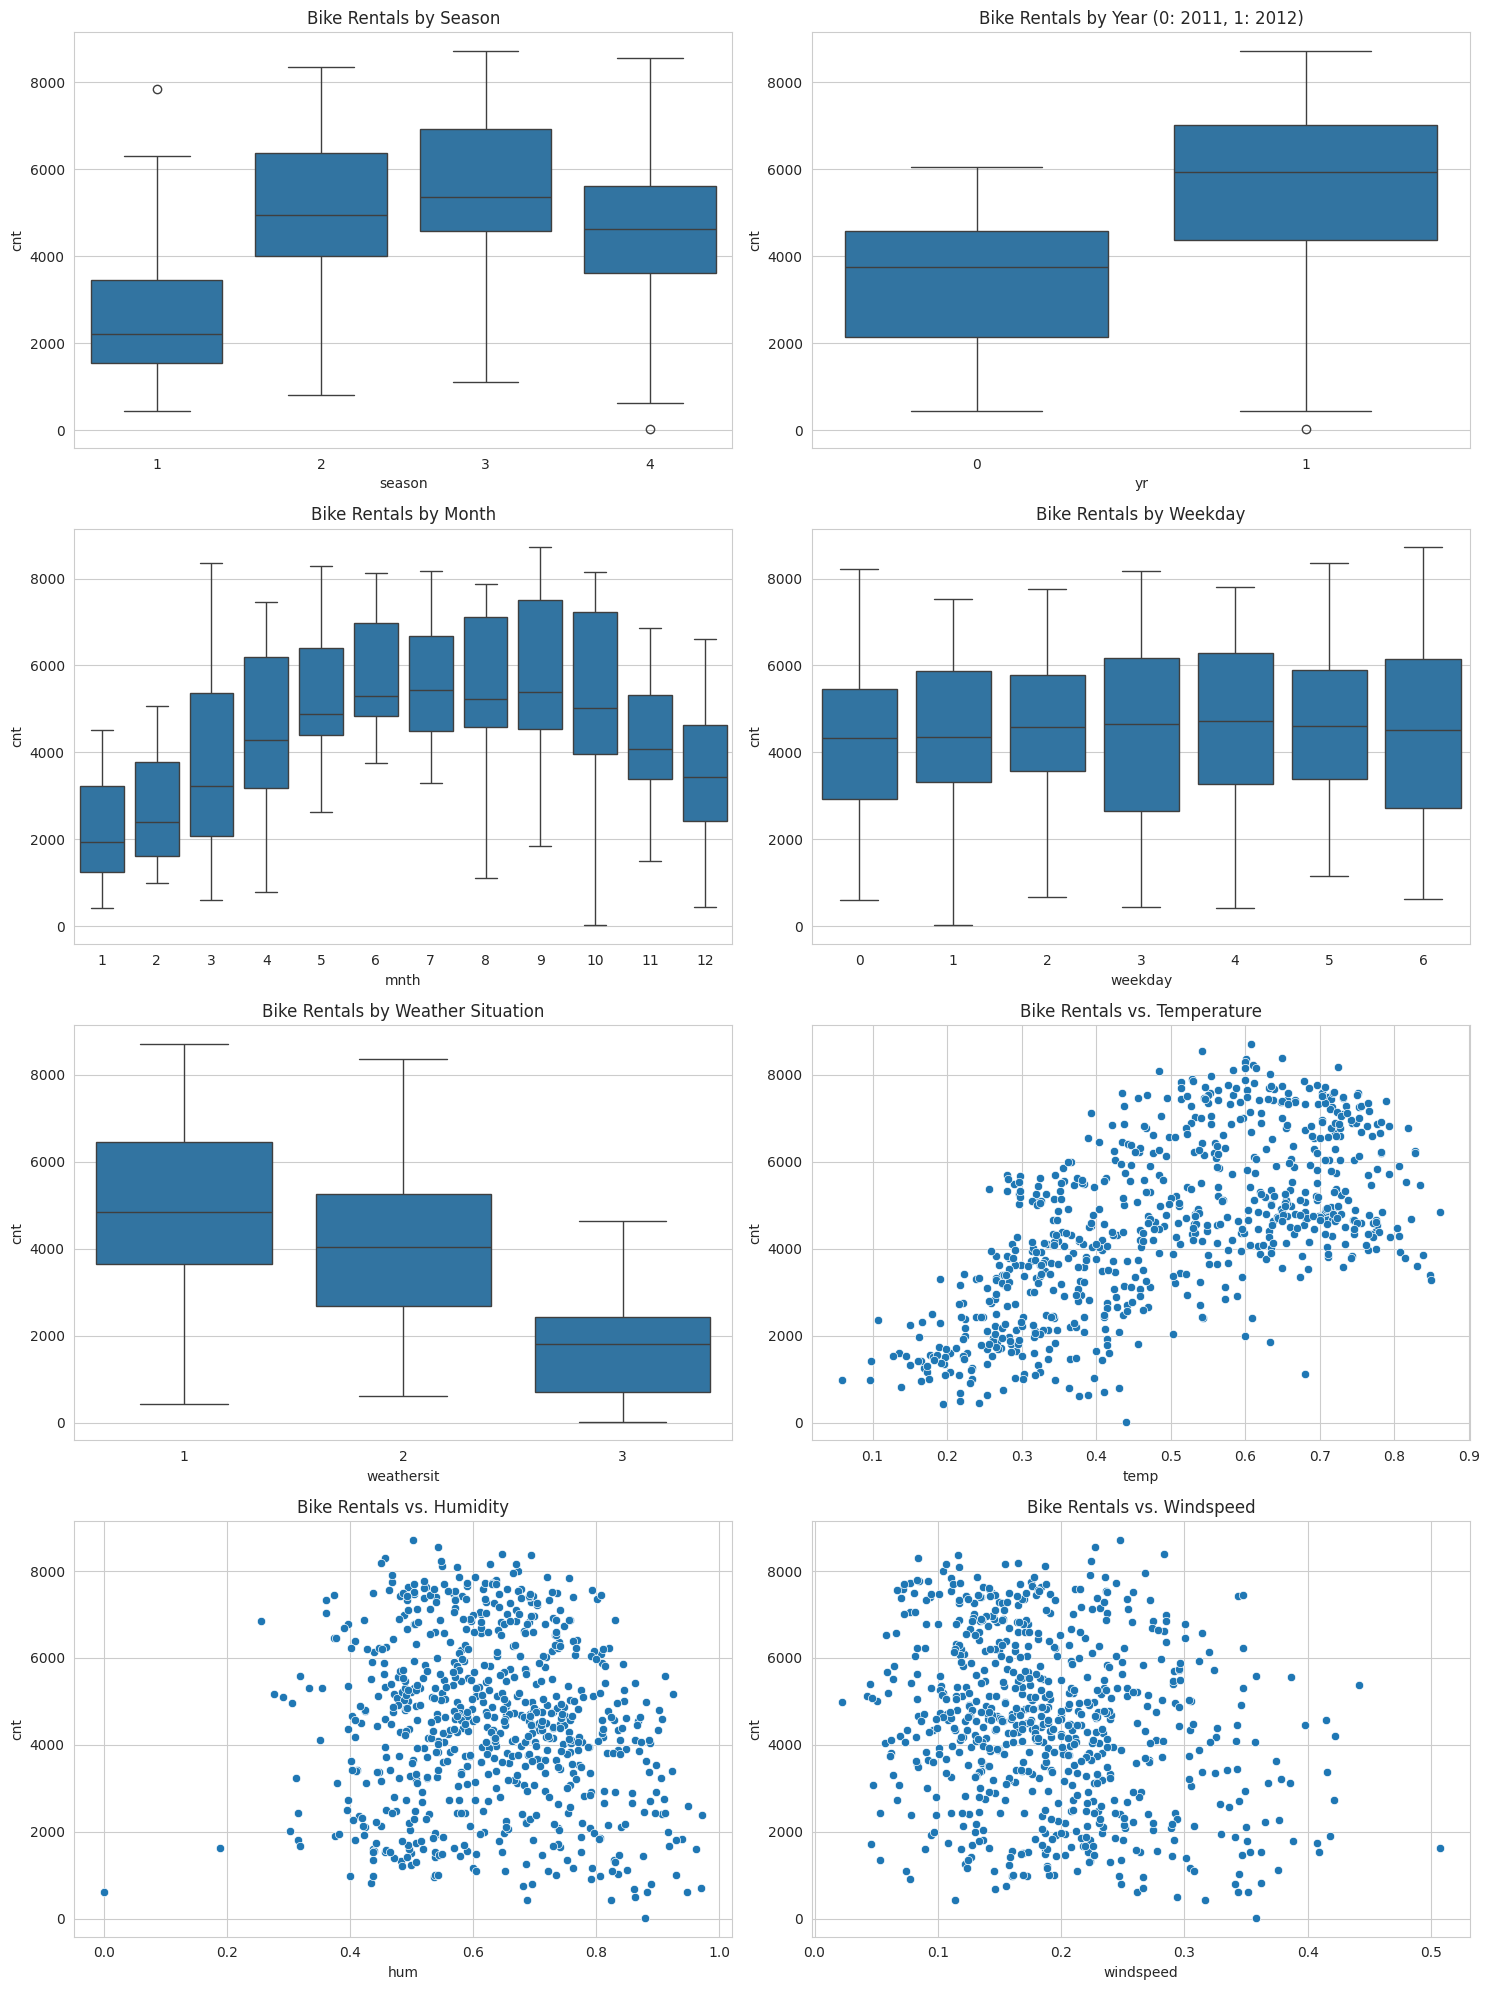


Summary statistics for numerical variables:
               cnt        temp       atemp         hum   windspeed
count   731.000000  731.000000  731.000000  731.000000  731.000000
mean   4504.348837    0.495385    0.474354    0.627894    0.190486
std    1937.211452    0.183051    0.162961    0.142429    0.077498
min      22.000000    0.059130    0.079070    0.000000    0.022392
25%    3152.000000    0.337083    0.337842    0.520000    0.134950
50%    4548.000000    0.498333    0.486733    0.626667    0.180975
75%    5956.000000    0.655417    0.608602    0.730209    0.233214
max    8714.000000    0.861667    0.840896    0.972500    0.507463


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create subplots for visualizations
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Plot relationships with 'cnt'
sns.boxplot(x='season', y='cnt', data=bike_data, ax=axes[0])
axes[0].set_title('Bike Rentals by Season')

sns.boxplot(x='yr', y='cnt', data=bike_data, ax=axes[1])
axes[1].set_title('Bike Rentals by Year (0: 2011, 1: 2012)')

sns.boxplot(x='mnth', y='cnt', data=bike_data, ax=axes[2])
axes[2].set_title('Bike Rentals by Month')

sns.boxplot(x='weekday', y='cnt', data=bike_data, ax=axes[3])
axes[3].set_title('Bike Rentals by Weekday')

sns.boxplot(x='weathersit', y='cnt', data=bike_data, ax=axes[4])
axes[4].set_title('Bike Rentals by Weather Situation')

sns.scatterplot(x='temp', y='cnt', data=bike_data, ax=axes[5])
axes[5].set_title('Bike Rentals vs. Temperature')

sns.scatterplot(x='hum', y='cnt', data=bike_data, ax=axes[6])
axes[6].set_title('Bike Rentals vs. Humidity')

sns.scatterplot(x='windspeed', y='cnt', data=bike_data, ax=axes[7])
axes[7].set_title('Bike Rentals vs. Windspeed')

plt.tight_layout()
plt.show()

# Compute summary statistics for numerical variables
numerical_summary = bike_data[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].describe()
print("\nSummary statistics for numerical variables:")
print(numerical_summary)

## **Questions for next stage**




In [ ]:
# Formulate hypothesis testing questions based on EDA findings
hypothesis_questions = [
    "Is there a statistically significant difference in the mean number of bike rentals between different seasons?",
    "Is there a statistically significant difference in the mean number of bike rentals between the year 2011 and 2012?",
    "Is there a statistically significant correlation between temperature and the total number of bike rentals?"
]

# Present the questions in a markdown cell
markdown_output = "## Hypothesis Testing Questions\n\nBased on the exploratory data analysis, the following questions can be investigated using hypothesis testing:\n\n"
for i, question in enumerate(hypothesis_questions):
    markdown_output += f"{i+1}. {question}\n"

print(markdown_output) # Use print to output markdown

## Hypothesis Testing Questions

Based on the exploratory data analysis, the following questions can be investigated using hypothesis testing:

1. Is there a statistically significant difference in the mean number of bike rentals between different seasons?
2. Is there a statistically significant difference in the mean number of bike rentals between the year 2011 and 2012?
3. Is there a statistically significant correlation between temperature and the total number of bike rentals?



## **Summary (EDA):**

*   Bike rentals show variations across different seasons, years, months, weekdays, and weather situations, as indicated by the box plots.
*   There appears to be a positive relationship between temperature and the number of bike rentals, while humidity and windspeed show less clear correlations with rentals based on the scatter plots.
*   The summary statistics provide a quantitative overview of the distribution of numerical variables, including the total bike rentals (cnt), temperature (temp), 'feels like' temperature (atemp), humidity (hum), and windspeed.


## **Data Analysis**

## **Hypothesis Test 1: Seasons vs. Bike Rentals**




### Hypothesis Formulation

**Null Hypothesis (H0):** There is no statistically significant difference in the mean total bike rentals across different seasons.

**Alternative Hypothesis (H1):** There is a statistically significant difference in the mean total bike rentals across different seasons.

--- Shapiro-Wilk Test for Normality of Residuals ---
Shapiro-Wilk Statistic: 0.9910
Shapiro-Wilk P-value: 0.0002
Conclusion: Residuals are NOT normally distributed (reject H0).


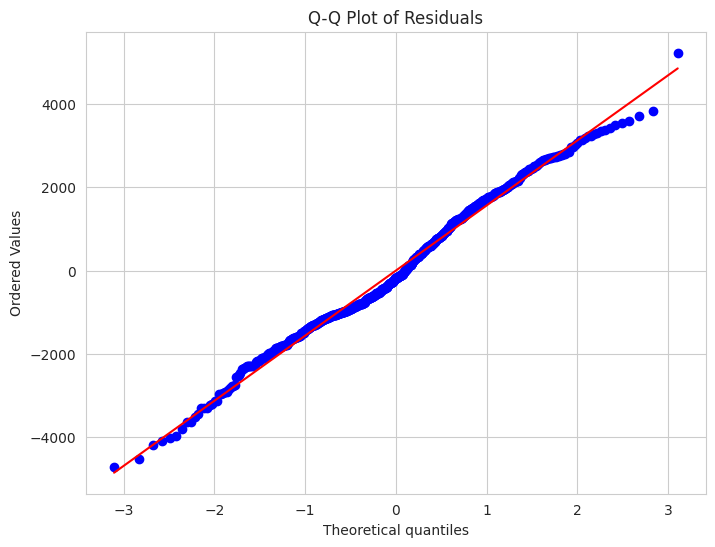

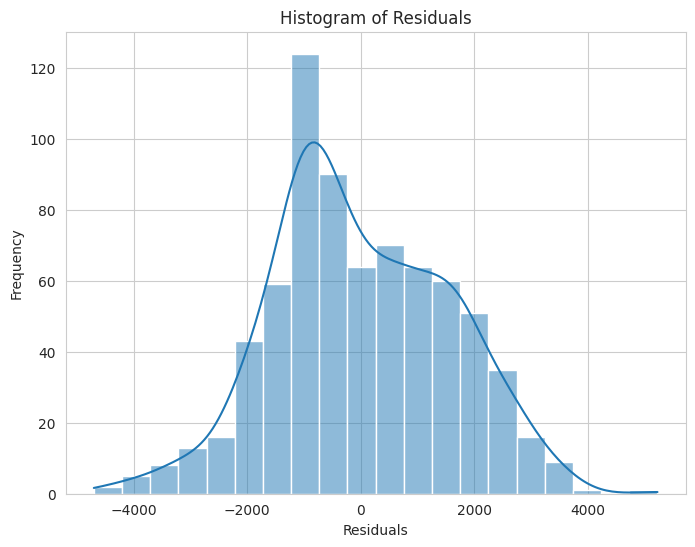

In [ ]:
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Fit OLS model to get residuals for normality check
# C(season) treats 'season' as a categorical variable
model = smf.ols('cnt ~ C(season)', data=bike_data).fit()
residuals = model.resid

print("--- Shapiro-Wilk Test for Normality of Residuals ---")
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Statistic: {shapiro_test.statistic:.4f}")
print(f"Shapiro-Wilk P-value: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue < 0.05:
    print("Conclusion: Residuals are NOT normally distributed (reject H0).")
else:
    print("Conclusion: Residuals appear normally distributed (fail to reject H0).")

# Visualize residuals with a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Also visualize with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print("--- Levene's Test for Homogeneity of Variances ---")
levene_test = stats.levene(bike_data['cnt'][bike_data['season'] == 1],
                           bike_data['cnt'][bike_data['season'] == 2],
                           bike_data['cnt'][bike_data['season'] == 3],
                           bike_data['cnt'][bike_data['season'] == 4])

print(f"Levene Statistic: {levene_test.statistic:.4f}")
print(f"Levene P-value: {levene_test.pvalue:.4f}")

if levene_test.pvalue < 0.05:
    print("Conclusion: Variances are NOT homogeneous (reject H0).")
else:
    print("Conclusion: Variances appear homogeneous (fail to reject H0).")

--- Levene's Test for Homogeneity of Variances ---
Levene Statistic: 3.2497
Levene P-value: 0.0214
Conclusion: Variances are NOT homogeneous (reject H0).


In [ ]:
print("--- One-Way ANOVA Test for Bike Rentals by Season ---")

anova_test = stats.f_oneway(bike_data['cnt'][bike_data['season'] == 1],
                            bike_data['cnt'][bike_data['season'] == 2],
                            bike_data['cnt'][bike_data['season'] == 3],
                            bike_data['cnt'][bike_data['season'] == 4])

print(f"F-statistic: {anova_test.statistic:.4f}")
print(f"P-value: {anova_test.pvalue:.4f}")

if anova_test.pvalue < 0.05:
    print("Conclusion: There is a statistically significant difference in the mean total bike rentals across different seasons (reject H0).")
else:
    print("Conclusion: There is NO statistically significant difference in the mean total bike rentals across different seasons (fail to reject H0).")

--- One-Way ANOVA Test for Bike Rentals by Season ---
F-statistic: 128.7696
P-value: 0.0000
Conclusion: There is a statistically significant difference in the mean total bike rentals across different seasons (reject H0).


In [ ]:
import statsmodels.stats.multicomp as multi

print("--- Post-hoc Tukey HSD Test for Bike Rentals by Season ---")

tukey_hsd = multi.pairwise_tukeyhsd(endog=bike_data['cnt'], groups=bike_data['season'], alpha=0.05)

print(tukey_hsd)

--- Post-hoc Tukey HSD Test for Bike Rentals by Season ---
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2 2388.1989    0.0 1965.3325 2811.0653   True
     1      3 3040.1706    0.0 2619.5409 3460.8003   True
     1      4 2124.0303    0.0 1697.6444 2550.4163   True
     2      3  651.9717 0.0004  233.0927 1070.8507   True
     2      4 -264.1686 0.3782 -688.8276  160.4904  False
     3      4 -916.1403    0.0 -1338.572 -493.7085   True
---------------------------------------------------------


--- Box Plot of Bike Rentals by Season ---


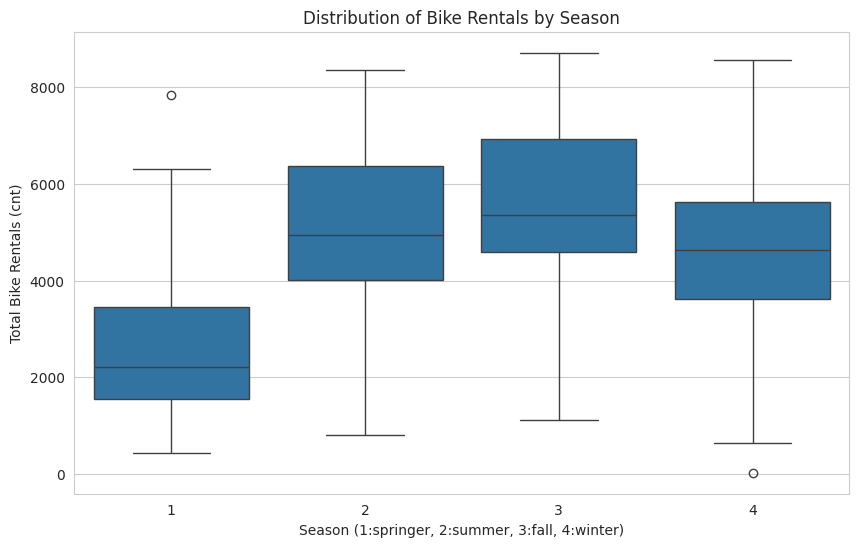

In [ ]:
print("--- Box Plot of Bike Rentals by Season ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=bike_data)
plt.title('Distribution of Bike Rentals by Season')
plt.xlabel('Season (1:springer, 2:summer, 3:fall, 4:winter)')
plt.ylabel('Total Bike Rentals (cnt)')
plt.show()

## **Hypothesis Test 2: Year vs. Bike Rentals**



### Hypothesis Formulation

**Null Hypothesis (H0):** There is no statistically significant difference in the mean total bike rentals between the year 2011 and the year 2012.

**Alternative Hypothesis (H1):** There is a statistically significant difference in the mean total bike rentals between the year 2011 and the year 2012.

In [ ]:
bike_data_2011 = bike_data[bike_data['yr'] == 0]['cnt']
bike_data_2012 = bike_data[bike_data['yr'] == 1]['cnt']

print(f"Number of bike rentals in 2011: {len(bike_data_2011)}")
print(f"Number of bike rentals in 2012: {len(bike_data_2012)}")

Number of bike rentals in 2011: 365
Number of bike rentals in 2012: 366


In [ ]:
print("--- Shapiro-Wilk Test for Normality of Bike Rentals in 2011 ---")
shapiro_2011 = stats.shapiro(bike_data_2011)
print(f"Shapiro-Wilk Statistic (2011): {shapiro_2011.statistic:.4f}")
print(f"Shapiro-Wilk P-value (2011): {shapiro_2011.pvalue:.4f}")

if shapiro_2011.pvalue < 0.05:
    print("Conclusion (2011): Bike rentals for 2011 are NOT normally distributed (reject H0).")
else:
    print("Conclusion (2011): Bike rentals for 2011 appear normally distributed (fail to reject H0).")

print("\n--- Shapiro-Wilk Test for Normality of Bike Rentals in 2012 ---")
shapiro_2012 = stats.shapiro(bike_data_2012)
print(f"Shapiro-Wilk Statistic (2012): {shapiro_2012.statistic:.4f}")
print(f"Shapiro-Wilk P-value (2012): {shapiro_2012.pvalue:.4f}")

if shapiro_2012.pvalue < 0.05:
    print("Conclusion (2012): Bike rentals for 2012 are NOT normally distributed (reject H0).")
else:
    print("Conclusion (2012): Bike rentals for 2012 appear normally distributed (fail to reject H0).")


--- Shapiro-Wilk Test for Normality of Bike Rentals in 2011 ---
Shapiro-Wilk Statistic (2011): 0.9436
Shapiro-Wilk P-value (2011): 0.0000
Conclusion (2011): Bike rentals for 2011 are NOT normally distributed (reject H0).

--- Shapiro-Wilk Test for Normality of Bike Rentals in 2012 ---
Shapiro-Wilk Statistic (2012): 0.9483
Shapiro-Wilk P-value (2012): 0.0000
Conclusion (2012): Bike rentals for 2012 are NOT normally distributed (reject H0).


In [ ]:
print("--- Levene's Test for Homogeneity of Variances between 2011 and 2012 Bike Rentals ---")
levene_test_yr = stats.levene(bike_data_2011, bike_data_2012)

print(f"Levene Statistic: {levene_test_yr.statistic:.4f}")
print(f"Levene P-value: {levene_test_yr.pvalue:.4f}")

if levene_test_yr.pvalue < 0.05:
    print("Conclusion: Variances are NOT homogeneous (reject H0).")
else:
    print("Conclusion: Variances appear homogeneous (fail to reject H0).")

--- Levene's Test for Homogeneity of Variances between 2011 and 2012 Bike Rentals ---
Levene Statistic: 14.2539
Levene P-value: 0.0002
Conclusion: Variances are NOT homogeneous (reject H0).


In [ ]:
print("--- Independent Samples t-test (Welch's) for Bike Rentals by Year ---")
t_test_results = stats.ttest_ind(bike_data_2011, bike_data_2012, equal_var=False)

print(f"T-statistic: {t_test_results.statistic:.4f}")
print(f"P-value: {t_test_results.pvalue:.4f}")

alpha = 0.05
if t_test_results.pvalue < alpha:
    print(f"Conclusion: With p-value {t_test_results.pvalue:.4f} < {alpha}, we reject the null hypothesis.")
    print("There is a statistically significant difference in the mean total bike rentals between 2011 and 2012.")
else:
    print(f"Conclusion: With p-value {t_test_results.pvalue:.4f} >= {alpha}, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean total bike rentals between 2011 and 2012.")

--- Independent Samples t-test (Welch's) for Bike Rentals by Year ---
T-statistic: -18.5777
P-value: 0.0000
Conclusion: With p-value 0.0000 < 0.05, we reject the null hypothesis.
There is a statistically significant difference in the mean total bike rentals between 2011 and 2012.


--- Box Plot of Bike Rentals by Year ---


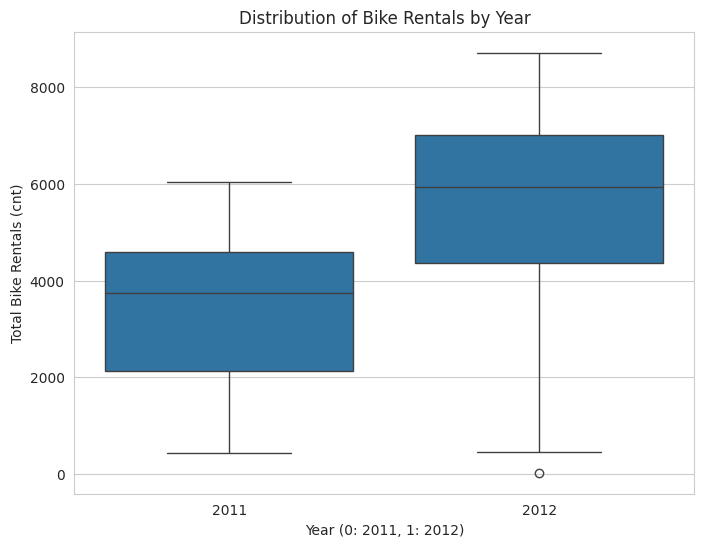

In [ ]:
print("--- Box Plot of Bike Rentals by Year ---")
plt.figure(figsize=(8, 6))
sns.boxplot(x='yr', y='cnt', data=bike_data)
plt.title('Distribution of Bike Rentals by Year')
plt.xlabel('Year (0: 2011, 1: 2012)')
plt.ylabel('Total Bike Rentals (cnt)')
plt.xticks(ticks=[0, 1], labels=['2011', '2012'])
plt.show()

## **Hypothesis Test 3: Temperature vs. Bike Rentals Correlation**



### Hypothesis Formulation

**Null Hypothesis (H0):** There is no statistically significant linear correlation between temperature ('temp') and the total number of bike rentals ('cnt').

**Alternative Hypothesis (H1):** There is a statistically significant linear correlation between temperature ('temp') and the total number of bike rentals ('cnt').

--- Scatter Plot of Bike Rentals vs. Temperature ---


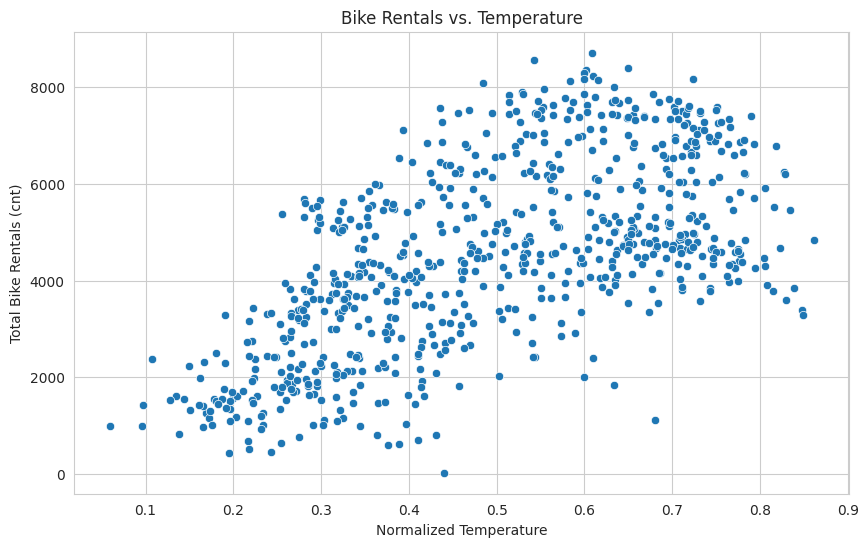

In [ ]:
print("--- Scatter Plot of Bike Rentals vs. Temperature ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=bike_data)
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Bike Rentals (cnt)')
plt.show()

In [ ]:
print("--- Pearson Correlation between Temperature and Bike Rentals ---")
correlation_coefficient, p_value = stats.pearsonr(bike_data['temp'], bike_data['cnt'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: With p-value {p_value:.4f} < {alpha}, we reject the null hypothesis.")
    print("There is a statistically significant linear correlation between temperature and total bike rentals.")
else:
    print(f"Conclusion: With p-value {p_value:.4f} >= {alpha}, we fail to reject the null hypothesis.")
    print("There is no statistically significant linear correlation between temperature and total bike rentals.")

--- Pearson Correlation between Temperature and Bike Rentals ---
Pearson Correlation Coefficient: 0.6275
P-value: 0.0000
Conclusion: With p-value 0.0000 < 0.05, we reject the null hypothesis.
There is a statistically significant linear correlation between temperature and total bike rentals.


## **Summary (Data Analysis)**:

### Data Analysis Key Findings

*   **Impact of Season on Bike Rentals (ANOVA & Tukey HSD Test):**
    *   The ANOVA test revealed a statistically significant difference in the mean total bike rentals across different seasons (F-statistic: 128.7696, p-value: 0.0000), allowing for the rejection of the null hypothesis.
    *   **Assumption Violations:** The Shapiro-Wilk test for normality of residuals (p-value: 0.0002) and Levene's test for homogeneity of variances (p-value: 0.0214) both indicated violations of ANOVA assumptions.
    *   **Post-hoc Analysis:** A Tukey HSD test indicated significant differences between most seasonal pairs. However, the comparison between season 2 (summer) and season 4 (winter) did *not* show a statistically significant difference in mean bike rentals (p-adj: 0.3782), suggesting similar rental patterns between these two seasons despite their distinct weather conditions. This is notable as one might intuitively expect a larger difference.
*   **Impact of Year on Bike Rentals (Welch's t-test):**
    *   An independent samples Welch's t-test (due to violated assumptions) showed a statistically significant difference in the mean total bike rentals between 2011 and 2012 (T-statistic: -18.5777, p-value: 0.0000).
    *   **Assumption Violations:** Both 2011 (p-value: 0.0000) and 2012 (p-value: 0.0000) bike rental data were found to be non-normally distributed by the Shapiro-Wilk test. Levene's test also indicated non-homogeneous variances between the two years (p-value: 0.0002).
    *   **Conclusion:** Bike rentals in 2012 were significantly higher than in 2011, as visually supported by the box plot.
*   **Correlation Between Temperature and Bike Rentals (Pearson Correlation):**
    *   There is a statistically significant, moderately strong positive linear correlation between temperature ('temp') and the total number of bike rentals ('cnt') (Pearson Correlation Coefficient: 0.6275, p-value: 0.0000). This implies that as temperature increases, the number of bike rentals tends to increase.

### Insights or Next Steps

*   The consistent violations of normality and homogeneity of variances in the ANOVA and t-tests suggest that non-parametric tests (e.g., Kruskal-Wallis for seasons, Mann-Whitney U for years) or robust statistical methods might provide more reliable inferences, especially given the large sample size which often causes small deviations from normality to be statistically significant.
*   The significant increase in bike rentals from 2011 to 2012, combined with the strong positive correlation with temperature, indicates that understanding and predicting weather patterns, alongside potential growth in bike-sharing program adoption, are crucial for operational planning and resource allocation.


## **Regression**


In [ ]:
# Create dummy variables for 'season' with drop_first=True
bike_data_encoded = pd.get_dummies(bike_data, columns=['season'], drop_first=True)

# Display the first 5 rows to verify
display(bike_data_encoded.head())

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
0,1,2011-01-01,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False,False,False
1,2,2011-01-02,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,False,False,False
2,3,2011-01-03,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False,False
3,4,2011-01-04,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False,False
4,5,2011-01-05,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False,False


### Multiple Linear Regression Model Formulation

**Model Equation:**
$$ cnt = \beta_0 + \beta_{temp} \cdot temp + \beta_{yr} \cdot yr + \beta_{season\_2} \cdot season\_2 + \beta_{season\_3} \cdot season\_3 + \beta_{season\_4} \cdot season\_4 + \epsilon $$

Where:
*   $cnt$: Total bike rentals (target variable).
*   $\beta_0$: Intercept (baseline rentals for Spring, 2011, at 0 temp).
*   $temp$: Normalized temperature.
*   $yr$: Year (0: 2011, 1: 2012).
*   $season\_2$: Dummy variable for Summer (1 if Summer, 0 otherwise).
*   $season\_3$: Dummy variable for Fall (1 if Fall, 0 otherwise).
*   $season\_4$: Dummy variable for Winter (1 if Winter, 0 otherwise).
*   $\epsilon$: Error term.
*   Note: Spring ($season=1$) is the reference category.

**Hypotheses for Regression Coefficients:**

For each predictor variable $X_i$ (where $i$ corresponds to temp, yr, season_2, season_3, season_4) with coefficient $\beta_i$:

*   **Null Hypothesis ($H_0$):** $\beta_i = 0$
    *   There is no linear relationship between the predictor $X_i$ and the total bike rentals ($cnt$), holding all other variables constant.
*   **Alternative Hypothesis ($H_1$):** $\beta_i \neq 0$
    *   There is a statistically significant linear relationship between the predictor $X_i$ and the total bike rentals ($cnt$), holding all other variables constant.

## **Check Regression Assumptions**



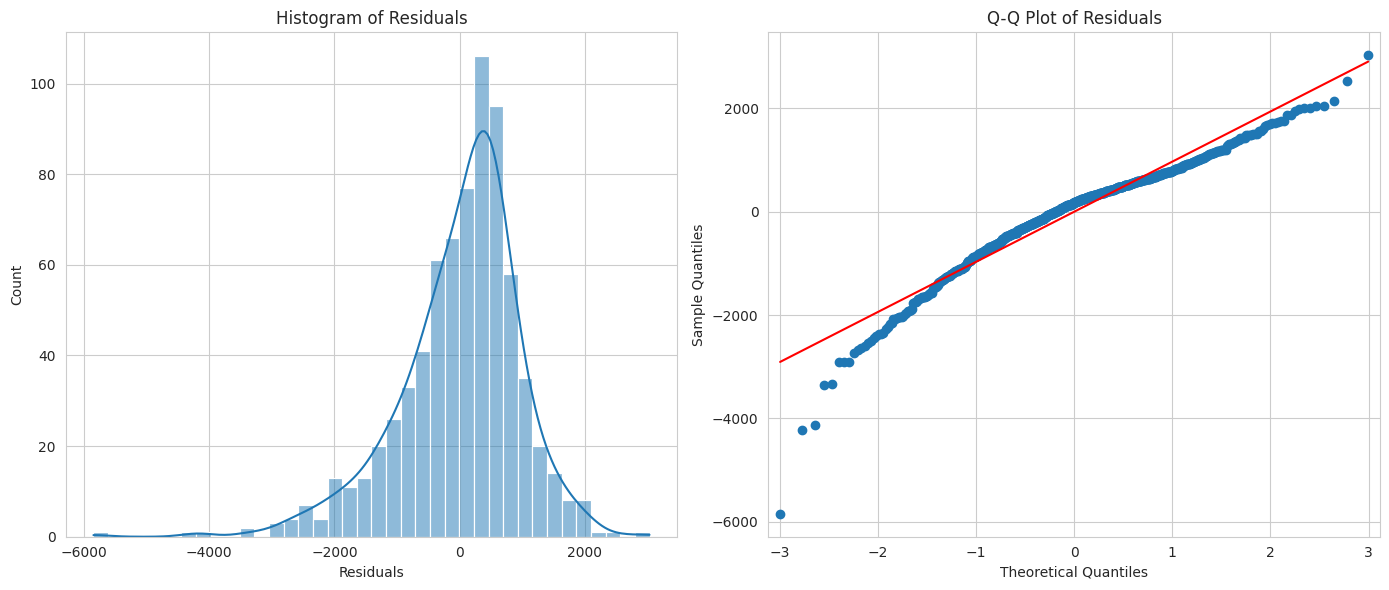

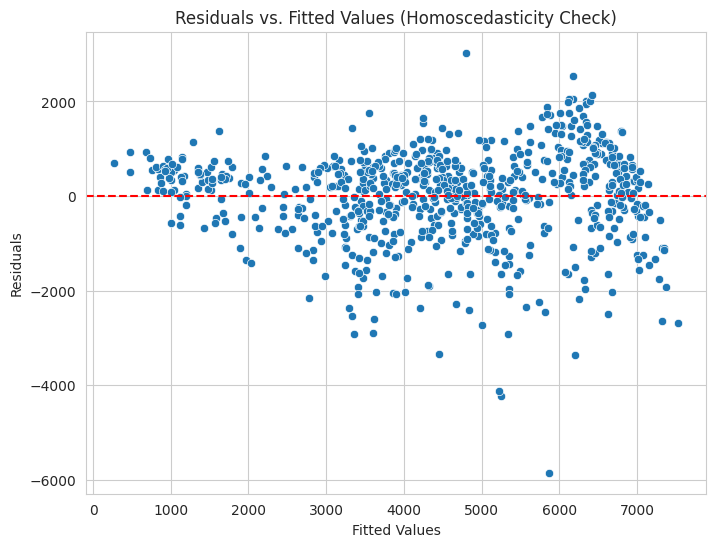

Variance Inflation Factor (VIF):
    Feature        VIF
0     const  13.077566
1      temp   3.222507
2        yr   1.007769
3  season_2   2.613012
4  season_3   4.586135
5  season_4   1.778575


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Define the predictor variables (X) and target variable (y)
# Converting boolean dummy variables to numeric (0/1) if necessary by casting to float
X = bike_data_encoded[['temp', 'yr', 'season_2', 'season_3', 'season_4']].astype(float)
X = sm.add_constant(X)  # Add a constant term for the intercept
y = bike_data_encoded['cnt']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Extract residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# --- Normality Check ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram with KDE
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')

# Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# --- Homoscedasticity Check ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# --- Multicollinearity Check (VIF) ---
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

## **Fit Model and Analyze Q1 (Season):**



In [ ]:
# 1. Display the comprehensive summary of the OLS regression model
print(model.summary())

# 2. Extract and print a specific summary table for season dummy variables
# Create a DataFrame for coefficients, p-values, and confidence intervals
summary_df = pd.DataFrame({
    'Coefficient': model.params,
    'P-value': model.pvalues,
    'CI Lower': model.conf_int()[0],
    'CI Upper': model.conf_int()[1]
})

# Filter for season variables
seasonal_vars = ['season_2', 'season_3', 'season_4']
seasonal_stats = summary_df.loc[seasonal_vars]

print("\n--- Specific Statistics for Season Variables (Baseline: Spring) ---")
print(seasonal_stats)

# 3. Analyze and print conclusion
print("\n--- Interpretation for Season Variables ---")
alpha = 0.05
seasons_map = {'season_2': 'Summer', 'season_3': 'Fall', 'season_4': 'Winter'}

for var, season_name in seasons_map.items():
    coef = model.params[var]
    pval = model.pvalues[var]

    if pval < alpha:
        significance = "statistically significant"
        direction = "higher" if coef > 0 else "lower"
        print(f"{season_name} (vs Spring): The difference is {significance} (p={pval:.4e}).")
        print(f"   Rentals are estimated to be {abs(coef):.2f} {direction} on average compared to Spring, holding other variables constant.")
    else:
        print(f"{season_name} (vs Spring): The difference is NOT statistically significant (p={pval:.4e}).")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     431.9
Date:                Fri, 05 Dec 2025   Prob (F-statistic):          1.34e-214
Time:                        07:41:21   Log-Likelihood:                -6065.0
No. Observations:                 731   AIC:                         1.214e+04
Df Residuals:                     725   BIC:                         1.217e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.0962    130.349     -0.331      0.7

In [ ]:
import pandas as pd

# 1. Display the comprehensive summary of the OLS regression model
print(model.summary())

# 2. Extract and print a specific summary table for season dummy variables
# Create a DataFrame for coefficients, p-values, and confidence intervals
summary_df = pd.DataFrame({
    'Coefficient': model.params,
    'P-value': model.pvalues,
    'CI Lower': model.conf_int()[0],
    'CI Upper': model.conf_int()[1]
})

# Filter for season variables
seasonal_vars = ['season_2', 'season_3', 'season_4']
seasonal_stats = summary_df.loc[seasonal_vars]

print("\n--- Specific Statistics for Season Variables (Baseline: Spring) ---")
print(seasonal_stats)

# 3. Analyze and print conclusion
print("\n--- Interpretation for Season Variables ---")
alpha = 0.05
seasons_map = {'season_2': 'Summer', 'season_3': 'Fall', 'season_4': 'Winter'}

for var, season_name in seasons_map.items():
    coef = model.params[var]
    pval = model.pvalues[var]

    if pval < alpha:
        significance = "statistically significant"
        direction = "higher" if coef > 0 else "lower"
        print(f"{season_name} (vs Spring): The difference is {significance} (p={pval:.4e}).")
        print(f"   Rentals are estimated to be {abs(coef):.2f} {direction} on average compared to Spring, holding other variables constant.")
    else:
        print(f"{season_name} (vs Spring): The difference is NOT statistically significant (p={pval:.4e}).")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     431.9
Date:                Fri, 05 Dec 2025   Prob (F-statistic):          1.34e-214
Time:                        07:41:21   Log-Likelihood:                -6065.0
No. Observations:                 731   AIC:                         1.214e+04
Df Residuals:                     725   BIC:                         1.217e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.0962    130.349     -0.331      0.7

## **Analyze Q2 (Year):**




In [ ]:
print("--- Analysis of Year Effect (2012 vs 2011) ---")

# 1. Extract coefficient and p-value for 'yr'
coef_yr = model.params['yr']
p_val_yr = model.pvalues['yr']

# 2. Print formatted values
print(f"Coefficient for 'yr': {coef_yr:.4f}")
print(f"P-value for 'yr': {p_val_yr:.4f}")

# 3. Interpret significance and effect
alpha = 0.05
if p_val_yr < alpha:
    print("\nInterpretation:")
    print(f"There is a statistically significant difference in mean bike rentals between 2011 and 2012 (p < {alpha}).")
    direction = "increase" if coef_yr > 0 else "decrease"
    print(f"Holding other variables constant, the year 2012 is associated with an estimated average {direction} of {abs(coef_yr):.2f} bike rentals compared to 2011.")
else:
    print("\nInterpretation:")
    print(f"There is no statistically significant difference in mean bike rentals between 2011 and 2012 (p = {p_val_yr:.4f} >= {alpha}).")

--- Analysis of Year Effect (2012 vs 2011) ---
Coefficient for 'yr': 2103.5143
P-value for 'yr': 0.0000

Interpretation:
There is a statistically significant difference in mean bike rentals between 2011 and 2012 (p < 0.05).
Holding other variables constant, the year 2012 is associated with an estimated average increase of 2103.51 bike rentals compared to 2011.


## **Analyze Q3 (Temperature):**



In [ ]:
print("--- Analysis of Temperature Effect ---")

# 1. Extract coefficient and p-value for 'temp'
coef_temp = model.params['temp']
p_val_temp = model.pvalues['temp']

# 2. Print formatted values
print(f"Coefficient for 'temp': {coef_temp:.4f}")
print(f"P-value for 'temp': {p_val_temp:.4f}")

# 3. Interpret significance and effect
alpha = 0.05
if p_val_temp < alpha:
    print("\nInterpretation:")
    print(f"There is a statistically significant linear relationship between normalized temperature and total bike rentals (p < {alpha}).")
    direction = "increase" if coef_temp > 0 else "decrease"
    print(f"Holding other variables constant, a one-unit increase in normalized temperature is associated with an estimated average {direction} of {abs(coef_temp):.2f} bike rentals.")
else:
    print("\nInterpretation:")
    print(f"There is no statistically significant linear relationship between normalized temperature and total bike rentals (p = {p_val_temp:.4f} >= {alpha}).")

--- Analysis of Temperature Effect ---
Coefficient for 'temp': 5338.9553
P-value for 'temp': 0.0000

Interpretation:
There is a statistically significant linear relationship between normalized temperature and total bike rentals (p < 0.05).
Holding other variables constant, a one-unit increase in normalized temperature is associated with an estimated average increase of 5338.96 bike rentals.


## **Summary (Regression):**


### Data Analysis Key Findings:

*   **Model Performance:** The Multiple Linear Regression model explains approximately **74.9%** of the variance in total bike rentals ($R^2 = 0.749$).
*   **Temperature Effect:** Temperature is a dominant predictor; a one-unit increase in normalized temperature is associated with an estimated increase of **5,338.96** bike rentals, holding other variables constant.
*   **Yearly Growth:** The model indicates a strong year-over-year growth, with 2012 showing an average increase of **2,103.51** rentals compared to 2011.
*   **Seasonal Impact (vs. Spring Baseline):**
    *   **Winter:** showed the largest positive difference with an estimated increase of **1,461.63** rentals.
    *   **Summer:** showed an estimated increase of **1,077.12** rentals.
    *   **Fall:** showed an estimated increase of **864.69** rentals.
*   **Assumption Checks:** The model shows no severe multicollinearity, as Variance Inflation Factors (VIF) for all predictors were below 5 (e.g., `season_3`: 4.59, `temp`: 3.22).

### Insights or Next Steps

*   **Operational Planning:** Given the strong coefficients for Temperature and Season, bike availability and maintenance schedules should be heavily optimized around warmer weather forecasts and the peak seasons (Winter/Summer relative to Spring).
*   **Trend Analysis:** The significant jump in rentals from 2011 to 2012 suggests growing popularity or market expansion. Future analysis should investigate if this growth trend continued in subsequent years or if it was influenced by specific external events.


# **Project Summary**

## **Key Findings**
*   **Data Quality & Exploration:** The dataset was found to be high-quality with no missing values. Exploratory analysis hinted at strong seasonal and weather-related trends.
*   **Statistical Significance (Hypothesis Tests):**
    *   **Seasonality:** ANOVA results confirmed significant differences in rentals across seasons. Post-hoc tests showed that Summer, Fall, and Winter all have significantly higher rentals than Spring.
    *   **Growth:** A t-test confirmed a significant increase in bike rentals from 2011 to 2012.
    *   **Weather:** Pearson correlation revealed a moderately strong positive relationship between temperature and rentals.
*   **Predictive Drivers (Regression Analysis):**
    *   The Multiple Linear Regression model ($R^2 \approx 0.75$) reinforced these findings.
    *   **Temperature** emerged as the strongest predictor, with a unit increase in normalized temperature associated with over 5,000 additional rentals.
    *   **Yearly Trend:** Controlling for other factors, 2012 saw an average daily increase of ~2,100 rentals over 2011.
    *   **Seasonality:** Winter surprised with the highest baseline increase relative to Spring when adjusting for temperature.

## **Learnings & Limitations**
*   **Learnings:** Temperature and seasonality are critical demand drivers. The system experienced significant organic growth year-over-year.
*   **Limitations:** Diagnostic plots revealed violations of normality and homoscedasticity assumptions, suggesting that a simple linear model doesn't fully capture the data's complexity (e.g., potential non-linear response to extreme heat).
*   **Future Directions:** Future work should explore non-linear models (e.g., Random Forest, GAMs) and time-series forecasting (e.g., ARIMA) to better handle the sequential nature of the data and potential weather thresholds.

## **References**

This dataset has been used in numerous studies on regression, time series forecasting, and interpretable machine learning. For example:
- Fanaee-T and Gama (2013) used it to detect temporal patterns and anomalies.
- Researchers have applied linear models, random forests, and neural networks to predict bike demand.
- It is featured in the book *Interpretable Machine Learning* by Christoph Molnar.

These works demonstrate its value for both practical and academic analysis.
